In [1]:
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

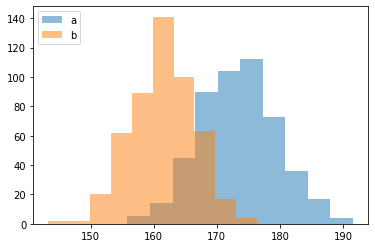

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / std * np.sqrt(PI * 2)) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

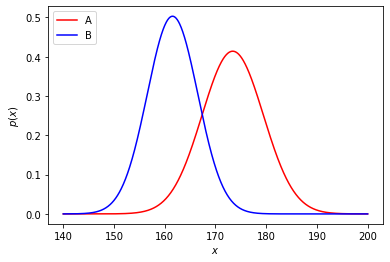

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


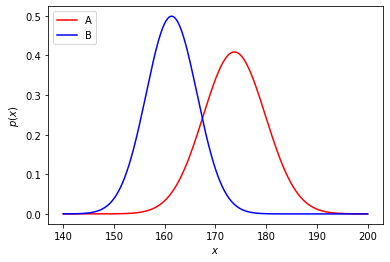

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)

0.25 0.75
Acc: 0.83


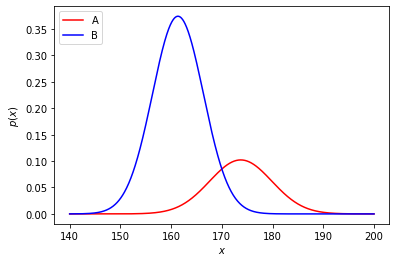

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


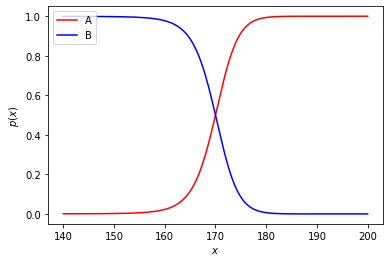

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : train dataset에 대하여 prior probability가 0.25:0.75가 나왔지만 test dataset에 대한 prior probability는 0.5:0.5가 나왔다. 따라서 prior probability를 0.5:0.5에서 0.25:0.75로 바꾸면 test data에 대하여 정확도가 떨어지게 된다.






# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [22]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


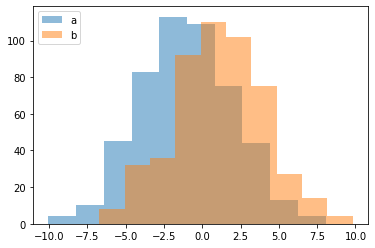

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

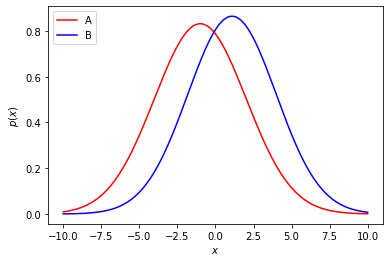

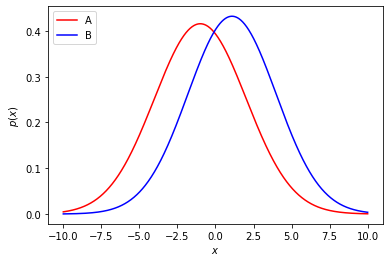

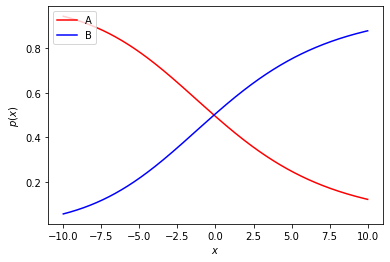

In [25]:
graph_x = np.linspace(-10, 10, 1000)
# likelihood 구하기
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
# likelihood에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x, B_graph_x)

# likelihood * prior에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x*A_prior, B_graph_x*B_prior)

# posterior에 대한 pdf 그리기
A_graph_prob, B_graph_prob = get_posterior(test_X, A_graph_x, B_graph_x, A_prior, B_prior)
show_pdf(graph_x, A_graph_prob, B_graph_prob)

In [26]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


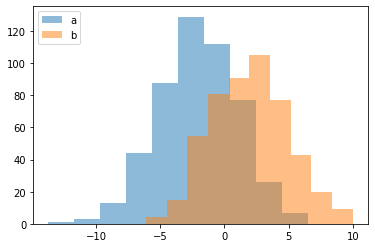

In [27]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

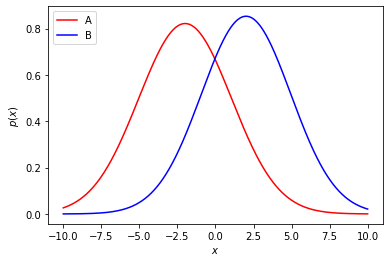

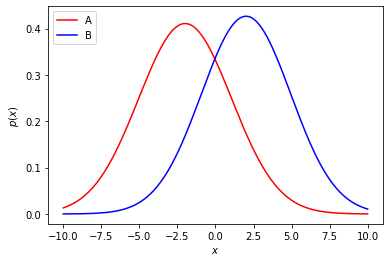

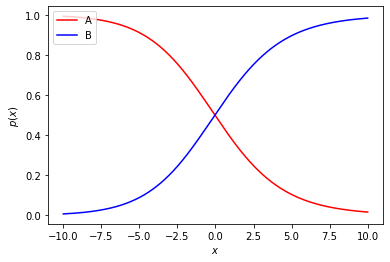

In [28]:
graph_x = np.linspace(-10, 10, 1000)
# likelihood 구하기
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
# likelihood에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x, B_graph_x)

# likelihood * prior에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x*A_prior, B_graph_x*B_prior)

# posterior에 대한 pdf 그리기
A_graph_prob, B_graph_prob = get_posterior(test_X, A_graph_x, B_graph_x, A_prior, B_prior)
show_pdf(graph_x, A_graph_prob, B_graph_prob)

In [29]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


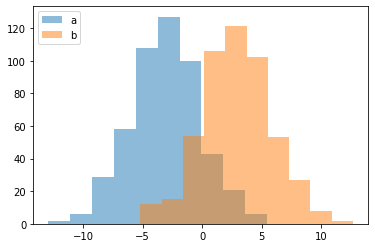

In [30]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

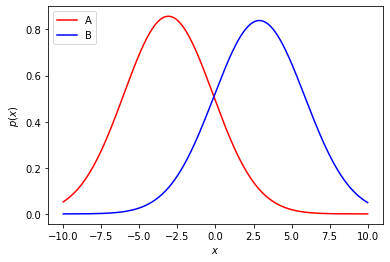

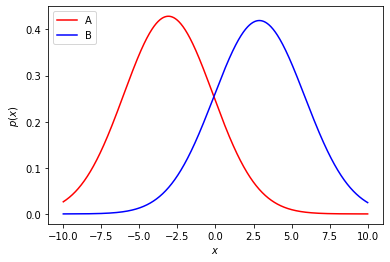

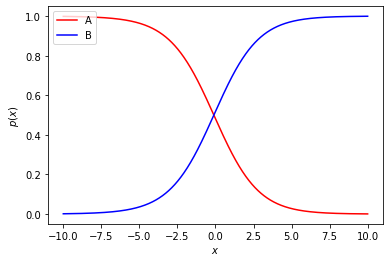

In [31]:
graph_x = np.linspace(-10, 10, 1000)
# likelihood 구하기
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
# likelihood에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x, B_graph_x)

# likelihood * prior에 대한 pdf 그리기
show_pdf(graph_x, A_graph_x*A_prior, B_graph_x*B_prior)

# posterior에 대한 pdf 그리기
A_graph_prob, B_graph_prob = get_posterior(test_X, A_graph_x, B_graph_x, A_prior, B_prior)
show_pdf(graph_x, A_graph_prob, B_graph_prob)

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.

Answer: 질의 응답 게시판에 Practice 3 히스토그램 아래에 그려도 된다고 하셔서 Practice 3의 히스토그램 아래에 그렸습니다.

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



In [32]:
def get_decisionpoint(m1, s1, m2, s2, A_prior, B_prior):
    # 계산결과 ax^2 + 2bx + c = 0 형태의 방정식이 도출되었음
    a = s1*s1-s2*s2
    b = s2*s2*m1-s1*s1*m2
    c = (s1*s1*m2*m2)-(s2*s2*m1*m1)+2*(s1*s1*s2*s2)*math.log((s2*A_prior)/(s1*B_prior))
    
    if a < 0:    # x^2의 계수가 음수일 경우 -를 곱하여야 계산에 영향을 미치지 않음.
        a = -1*a
        b = -1*b
        c = -1*c
    else: 
        pass
    
    # 근의 공식 적용(짝수)
    x = ((-1*b)-np.sqrt(b*b-a*c))/a
    
    return x

In [33]:
def show_pdf_with_dp(x, Y_A, Y_B, dp_x, dp_y):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    # 기존 show_pdf 함수에 점을 찍는 함수 추가
    plt.scatter(dp_x, dp_y)
    plt.show()

In [34]:
def get_accuracy_with_dp(Y_test, X_test, dp):
    # 기존 get_accuracy 함수에서 조건식 변경: x좌표가 decision point보다 작을 시 0으로 분류, 클 시 1로 분류
    y_pred = np.where(dp > X_test, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

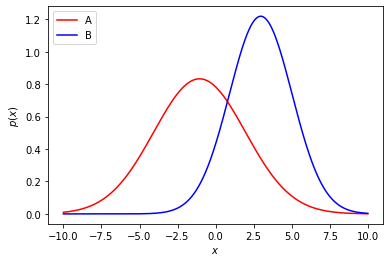

prior: 0.5, 0.5


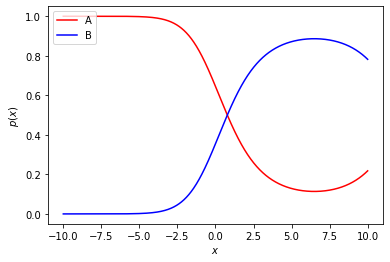

decision point: 0.8261096441444238


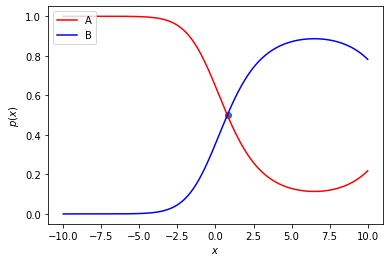

In [35]:
# mu와 s에 대한 변수 선언
m1 = -1
s1 = 3
m2 = 3
s2 = 2
# [problem A]

# P(A) = P(B) --> 둘 다 prior 0.5

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)

graph_x = np.linspace(-10, 10, 1000)
# p(x|A), p(x|B) 구하기
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))

# p(x|A), p(x|B)의 pdf 그리기
show_pdf(graph_x, A_graph_x, B_graph_x)

# prior 구하기
A_prior, B_prior = get_prior(train_A, train_B)    # 0.5:0.5
print(f"prior: {A_prior}, {B_prior}")

# P(A|x), P(B|x) 구하기
A_graph_prob, B_graph_prob = get_posterior(test_X, A_graph_x, B_graph_x, A_prior, B_prior)

# P(A|x), P(B|x)의 pdf 그리기
show_pdf(graph_x, A_graph_prob, B_graph_prob)

# [problem C] decision point 계산
x = get_decisionpoint(m1, s1, m2, s2, A_prior, B_prior)
print(f"decision point: {x}")

# decision point를 포함한 P(A|x), P(B|x)의 pdf 그리기
evidence = (pdf(x, m1, s1) * A_prior) + (pdf(x, m2, s2) * B_prior)
y = pdf(x, m1, s1) * A_prior / evidence
show_pdf_with_dp(graph_x, A_graph_prob, B_graph_prob, x, y)

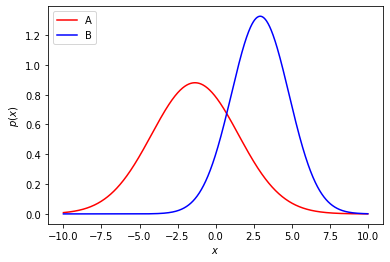

prior: 0.333, 0.667


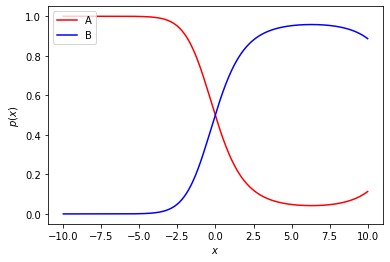

decision point: -0.035512999122378375


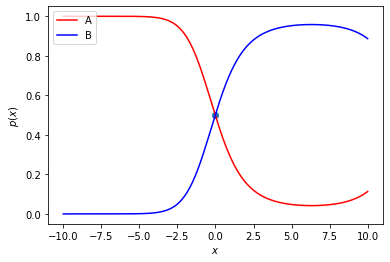

In [36]:
# [problem B]
# P(A)= 1/3,  P(B)= 2/3

# Train data
train_A, train_B, _, _ = get_data(1000, 1/3, -1, 3, 3, 2)

graph_x = np.linspace(-10, 10, 1000)
# p(x|A), p(x|B) 구하기
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))

# p(x|A), p(x|B)의 pdf 그리기
show_pdf(graph_x, A_graph_x, B_graph_x)

# prior 구하기
A_prior, B_prior = get_prior(train_A, train_B)    # 0.333:0.667
print(f"prior: {A_prior}, {B_prior}")

# P(A|x), P(B|x) 구하기
A_graph_prob, B_graph_prob = get_posterior(test_X, A_graph_x, B_graph_x, A_prior, B_prior)

# P(A|x), P(B|x)의 pdf 그리기
show_pdf(graph_x, A_graph_prob, B_graph_prob)

# [problem C] decision point 계산
x = get_decisionpoint(m1, s1, m2, s2, A_prior, B_prior)
print(f"decision point: {x}")

# decision point를 포함한 P(A|x), P(B|x)의 pdf 그리기
evidence = (pdf(x, m1, s1) * A_prior) + (pdf(x, m2, s2) * B_prior)
y = pdf(x, m1, s1) * A_prior / evidence
show_pdf_with_dp(graph_x, A_graph_prob, B_graph_prob, x, y)

Problem D) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

Answer: Decision point를 기점으로 class 구분이 달라지므로 x가 decision point보다 작은 값이라면 A class로 구분하고 decision point보다 큰 값이라면 B class로 구분할 수 있다.

In [37]:
# [problem E]: P(A)=P(B) --> 각 prior = 0.5

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)

# Test data: 100개 샘플링
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 3, 2)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

# prior 구하기
A_prior, B_prior = get_prior(train_A, train_B)    # 0.5:0.5
print(f"prior: {A_prior}, {B_prior}")

# decision point 계산
x = get_decisionpoint(m1, s1, m2, s2, A_prior, B_prior)
print(f"decision point: {x}")

# train data에 대한 accuracy (그냥 bayesian classifier를 적용)
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc(trained by bayesian classifier): {get_accuracy(test_Y, A_prob, B_prob)}')

# decision point를 구하여 decision point만을 가지고 분류한 결과의 accuracy
print(f"Acc(test data with the decision point): {get_accuracy_with_dp(test_Y, test_X, x)}")

# Result: accuracy에 대하여 거의 차이가 없음.

prior: 0.5, 0.5
decision point: 0.8261096441444238
Acc(trained by bayesian classifier): 0.85
Acc(test data with the decision point): 0.85
